<a href="https://colab.research.google.com/github/salarMokhtariL/Student-Sleep-Patterns/blob/main/Student_Sleep_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
file_path = 'student_sleep_patterns.csv'
df = pd.read_csv(file_path)
df

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


In [ ]:
if df.isnull().sum().any():
    df = df.dropna()
    print("Missing values handled.")

In [ ]:
X = df.drop(columns=['Sleep_Quality'])
y = df['Sleep_Quality']

y = y.apply(lambda x: 1 if x == 'Good' else 0)

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [ ]:
class SleepNN(nn.Module):
    def __init__(self, input_size):
        super(SleepNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.4)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)
        x = torch.relu(self.layer2(x))
        x = self.dropout(x)
        x = torch.relu(self.layer3(x))
        x = self.layer4(x)
        x = self.sigmoid(x)
        return x

In [ ]:
input_size = X_train.shape[1]
model = SleepNN(input_size)

In [ ]:
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

num_epochs = 1000
batch_size = 64
loss_values = []

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = loss_function(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_values.append(avg_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [10/1000], Loss: 0.0351
Epoch [20/1000], Loss: 0.0021
Epoch [30/1000], Loss: 0.0009
Epoch [40/1000], Loss: 0.0009
Epoch [50/1000], Loss: 0.0004
Epoch [60/1000], Loss: 0.0003
Epoch [70/1000], Loss: 0.0001
Epoch [80/1000], Loss: 0.0002
Epoch [90/1000], Loss: 0.0001
Epoch [100/1000], Loss: 0.0001
Epoch [110/1000], Loss: 0.0001
Epoch [120/1000], Loss: 0.0001
Epoch [130/1000], Loss: 0.0001
Epoch [140/1000], Loss: 0.0001
Epoch [150/1000], Loss: 0.0001
Epoch [160/1000], Loss: 0.0001
Epoch [170/1000], Loss: 0.0001
Epoch [180/1000], Loss: 0.0000
Epoch [190/1000], Loss: 0.0000
Epoch [200/1000], Loss: 0.0000
Epoch [210/1000], Loss: 0.0000
Epoch [220/1000], Loss: 0.0000
Epoch [230/1000], Loss: 0.0000
Epoch [240/1000], Loss: 0.0000
Epoch [250/1000], Loss: 0.0000
Epoch [260/1000], Loss: 0.0000
Epoch [270/1000], Loss: 0.0000
Epoch [280/1000], Loss: 0.0000
Epoch [290/1000], Loss: 0.0000
Epoch [300/1000], Loss: 0.0000
Epoch [310/1000], Loss: 0.0000
Epoch [320/1000], Loss: 0.0000
Epoch [330/1000],

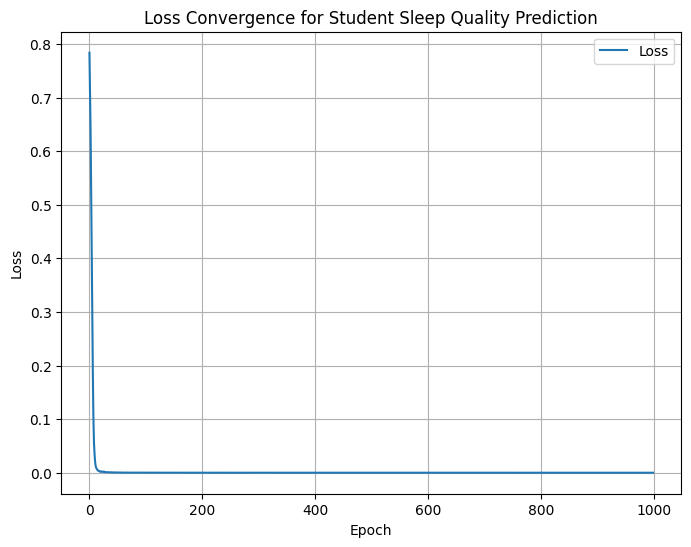

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(loss_values, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Convergence for Student Sleep Quality Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = (predictions > 0.5).float()
    accuracy = (predictions == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Model Accuracy: {accuracy * 100:.2f}%')

    # Additional evaluation metrics
    y_true = y_test_tensor.numpy()
    y_pred = predictions.numpy()
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
 [[100]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
def test_model(model, test_data):
    model.eval()
    with torch.no_grad():
        predictions = model(test_data)
        predictions = (predictions > 0.5).float()
        return predictions

sample_test_data = X_test_tensor[:5]
sample_predictions = test_model(model, sample_test_data)
print("Sample Predictions:", sample_predictions)

Sample Predictions: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])
